#Librerías necesarias
Ejecutar primero estas celdas para la instalación e importanción de las librerías que se necesitan para ejecutar el código.

In [1]:
!pip install -U control qtpy;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 5.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
# import math
import matplotlib.pyplot as plt
import control as ctrl
from control.matlab import * #permite escribir igual que en Matlab
import cmath as cm
from scipy import signal, fft
from math import log10

#Ejercicio 7 del TP3
En este ejercicio se pide crear diferentes señales de PRBS, y analizar el resultado con su autoespectro y su espectro en potencia.

##Código de generación de todas las señales PRBS.
Se generan las señales:
PRBS4, PRBS9, PRBS11, PRBS15 y PRBS20

In [3]:
# --- Parámetros Comunes (Puedes ajustarlos) ---
num_bits_to_plot = 5000 # Número de bits a generar y graficar para la mayoría
default_seed = None   # Usar None para semilla por defecto (todos unos), o una lista/tupla específica

# --- PRBS4 ---
print("Generando PRBS4...")
n_4 = 4
taps_4 = [4, 3] # Polinomio: x^4 + x^3 + 1
num_bits_4 = 5000 # Mostramos un poco más de un periodo (periodo max = 15)

# Inicialización del estado
state_4 = [1] * n_4
if default_seed is not None and len(default_seed) == n_4:
    if all(s == 0 for s in default_seed):
      print("Advertencia PRBS4: La semilla no puede ser todo ceros. Usando 'todos unos'.")
      state_4 = [1] * n_4
    else:
      state_4 = list(default_seed)
elif default_seed is not None:
     print(f"Advertencia PRBS4: Longitud de semilla incorrecta. Usando 'todos unos'.")
     state_4 = [1] * n_4

taps_idx_4 = [t - 1 for t in taps_4]
prbs4_sequence = []

# Bucle de generación LFSR
for _ in range(num_bits_4):
    feedback_bit = 0
    for tap_index in taps_idx_4:
        feedback_bit ^= state_4[tap_index]
    output_bit = state_4[n_4 - 1]
    prbs4_sequence.append(output_bit)
    state_4[1:n_4] = state_4[0:n_4-1]
    state_4[0] = feedback_bit

prbs4_sequence_mapped = [1 if bit == 1 else -1 for bit in prbs4_sequence]

# --- PRBS9 ---
print("Generando PRBS9")
n_9 = 9
taps_9 = [9, 5] # Polinomio: x^9 + x^5 + 1
map_levels_9 = (-1, 1) # Ejemplo de mapeo para control

# Inicialización del estado
state_9 = [1] * n_9
# (Podrías añadir lógica de semilla personalizada similar a PRBS4 si lo deseas)

taps_idx_9 = [t - 1 for t in taps_9]
prbs9_sequence_01 = [] # Guardamos la secuencia 0/1 primero

# Bucle de generación LFSR
for _ in range(num_bits_to_plot):
    feedback_bit = 0
    for tap_index in taps_idx_9:
        feedback_bit ^= state_9[tap_index]
    output_bit = state_9[n_9 - 1]
    prbs9_sequence_01.append(output_bit)
    state_9[1:n_9] = state_9[0:n_9-1]
    state_9[0] = feedback_bit

# Mapear a los niveles deseados
level_0, level_1 = map_levels_9
prbs9_sequence_mapped = [level_1 if bit == 1 else level_0 for bit in prbs9_sequence_01]


# --- PRBS11 ---
print("Generando PRBS11...")
n_11 = 11
taps_11 = [11, 9] # Polinomio: x^11 + x^9 + 1

# Inicialización del estado
state_11 = [1] * n_11
# (Podrías añadir lógica de semilla personalizada)

taps_idx_11 = [t - 1 for t in taps_11]
prbs11_sequence = []

# Bucle de generación LFSR
for _ in range(num_bits_to_plot):
    feedback_bit = 0
    for tap_index in taps_idx_11:
        feedback_bit ^= state_11[tap_index]
    output_bit = state_11[n_11 - 1]
    prbs11_sequence.append(output_bit)
    state_11[1:n_11] = state_11[0:n_11-1]
    state_11[0] = feedback_bit

prbs11_sequence_mapped = [1 if bit == 1 else -1 for bit in prbs11_sequence]

# --- PRBS15 ---
print("Generando PRBS15...")
n_15 = 15
taps_15 = [15, 14] # Polinomio: x^15 + x^14 + 1

# Inicialización del estado
state_15 = [1] * n_15
# (Podrías añadir lógica de semilla personalizada)

taps_idx_15 = [t - 1 for t in taps_15]
prbs15_sequence = []

# Bucle de generación LFSR
for _ in range(num_bits_to_plot):
    feedback_bit = 0
    for tap_index in taps_idx_15:
        feedback_bit ^= state_15[tap_index]
    output_bit = state_15[n_15 - 1]
    prbs15_sequence.append(output_bit)
    state_15[1:n_15] = state_15[0:n_15-1]
    state_15[0] = feedback_bit

prbs15_sequence_mapped = [1 if bit == 1 else -1 for bit in prbs15_sequence]

# --- PRBS20 ---
print("Generando PRBS20...")
n_20 = 20
taps_20 = [20, 3] # Polinomio: x^20 + x^3 + 1
num_bits_20_plot = 5000 # Mostramos un poco más para PRBS20

# Inicialización del estado
state_20 = [1] * n_20
# (Podrías añadir lógica de semilla personalizada)

taps_idx_20 = [t - 1 for t in taps_20]
prbs20_sequence = []

# Bucle de generación LFSR
for _ in range(num_bits_20_plot):
    feedback_bit = 0
    for tap_index in taps_idx_20:
        feedback_bit ^= state_20[tap_index]
    output_bit = state_20[n_20 - 1]
    prbs20_sequence.append(output_bit)
    state_20[1:n_20] = state_20[0:n_20-1]
    state_20[0] = feedback_bit

prbs20_sequence_mapped = [1 if bit == 1 else -1 for bit in prbs20_sequence]


Generando PRBS4...
Generando PRBS9
Generando PRBS11...
Generando PRBS15...
Generando PRBS20...


###Ploteo de las diferentes señales PRBS
Estos ploteos contienen la señal, autocorrelación y espectro en potencia respectivamente.

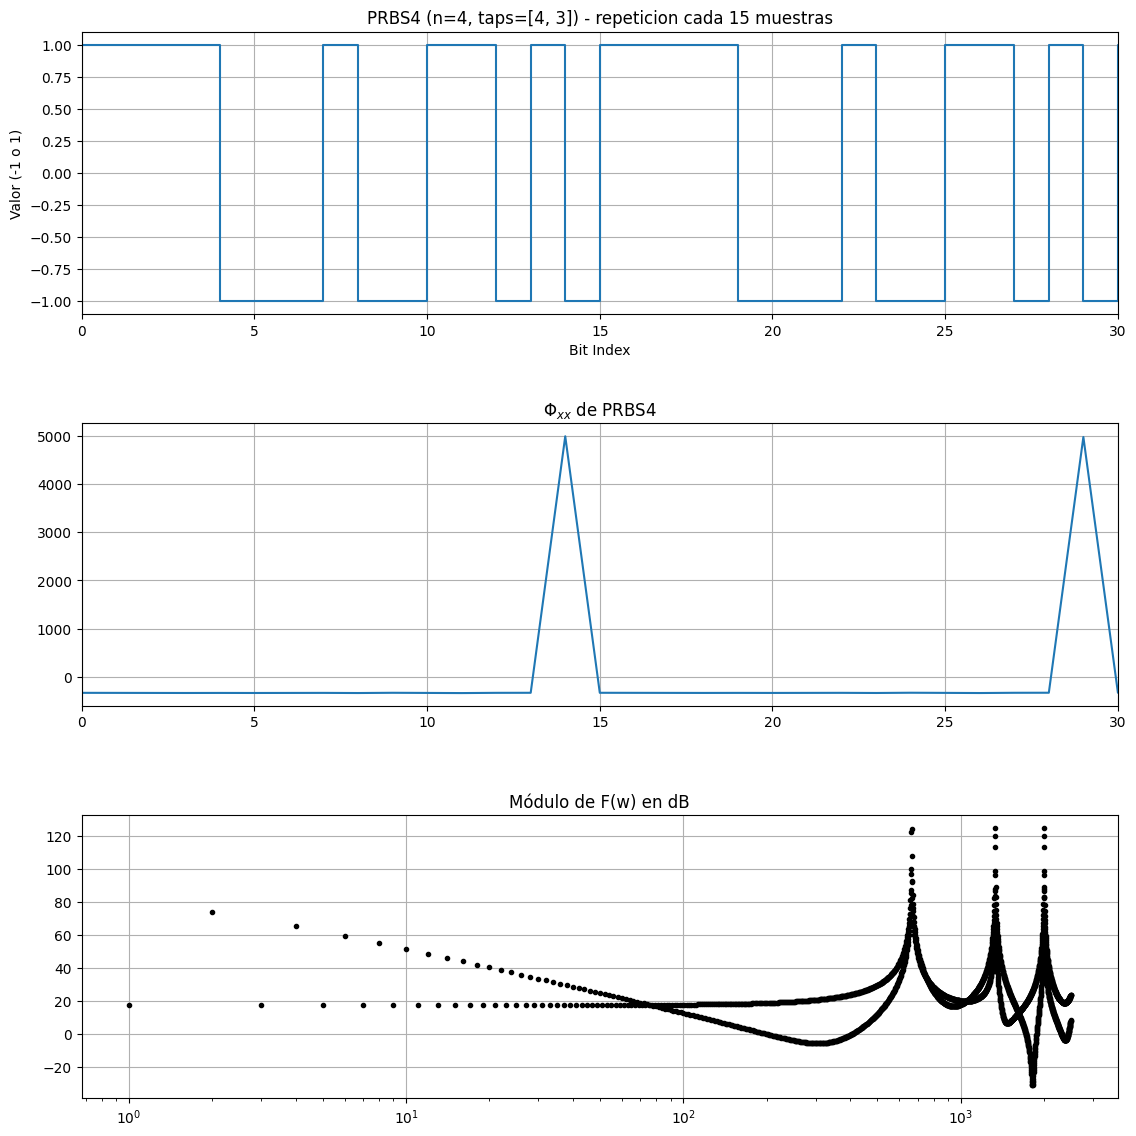

In [9]:
# Grafico de las tres imágenes
plt.figure(1,figsize=(12, 12))
# Usamos 'steps-post' para que se vea como una señal digital
plt.subplot(3,1,1)
plt.step(range(num_bits_4), prbs4_sequence_mapped, where='post')
plt.title(f'PRBS4 (n={n_4}, taps={taps_4}) - repeticion cada {2**4-1} muestras')
plt.xlabel('Bit Index')
plt.ylabel('Valor (-1 o 1)')
plt.ylim(-1.1, 1.1) # Ajustar límites para ver bien 0 y 1
plt.xlim(0, 30)
plt.grid(True)

fixx4=signal.correlate(prbs4_sequence_mapped, prbs4_sequence_mapped, mode='full')
SxM4=fft.fft(fixx4)

plt.subplot(3,1,2)
plt.grid(True)
plt.title(r'$\Phi_{xx}$ de PRBS4')
plt.plot(fixx4[num_bits_4:2*num_bits_4-1])
plt.xlim(0, 30)


plt.subplot(3,1,3)
plt.grid(True)
plt.title("Módulo de F(w) en dB")
plt.semilogx(20*np.log10(abs(SxM4[1:int(num_bits_4/2)])), ".k")
plt.tight_layout(pad=3.0)
plt.show()


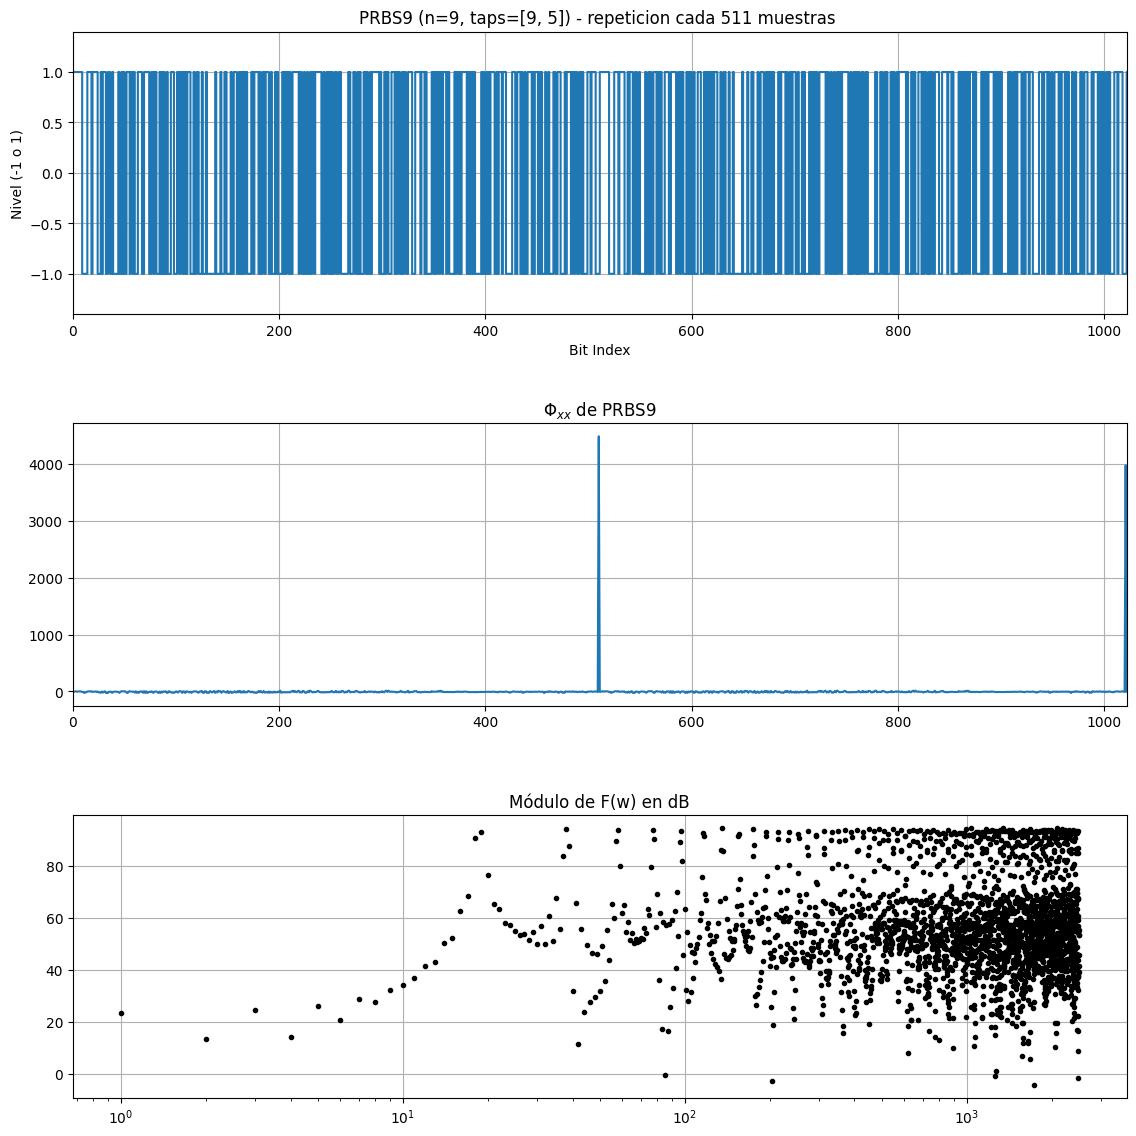

In [5]:
# Graficar PRBS9 Mapeado
plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)
plt.step(range(num_bits_to_plot), prbs9_sequence_mapped, where='post')
plt.title(f'PRBS9 (n={n_9}, taps={taps_9}) - repeticion cada {2**9-1} muestras ')
plt.xlabel('Bit Index')
plt.ylabel(f'Nivel ({level_0} o {level_1})')
plt.ylim(level_0 - 0.2 * abs(level_1 - level_0), level_1 + 0.2 * abs(level_1 - level_0)) # Ajustar límites Y
plt.xlim(0, 1022)
plt.grid(True)

fixx9=signal.correlate(prbs9_sequence_mapped, prbs9_sequence_mapped, mode='full')
SxM9=fft.fft(fixx9)

plt.subplot(3,1,2)
plt.grid(True)
plt.plot(fixx9[num_bits_to_plot:2*num_bits_to_plot-1])
plt.title(r'$\Phi_{xx}$ de PRBS9')
plt.xlim(0, 1022)
plt.subplot(3,1,3)
plt.grid(True)
plt.title("Módulo de F(w) en dB")
plt.semilogx(20*np.log10(abs(SxM9[1:int(num_bits_to_plot/2)])), ".k")
plt.tight_layout(pad=3.0)
plt.show()

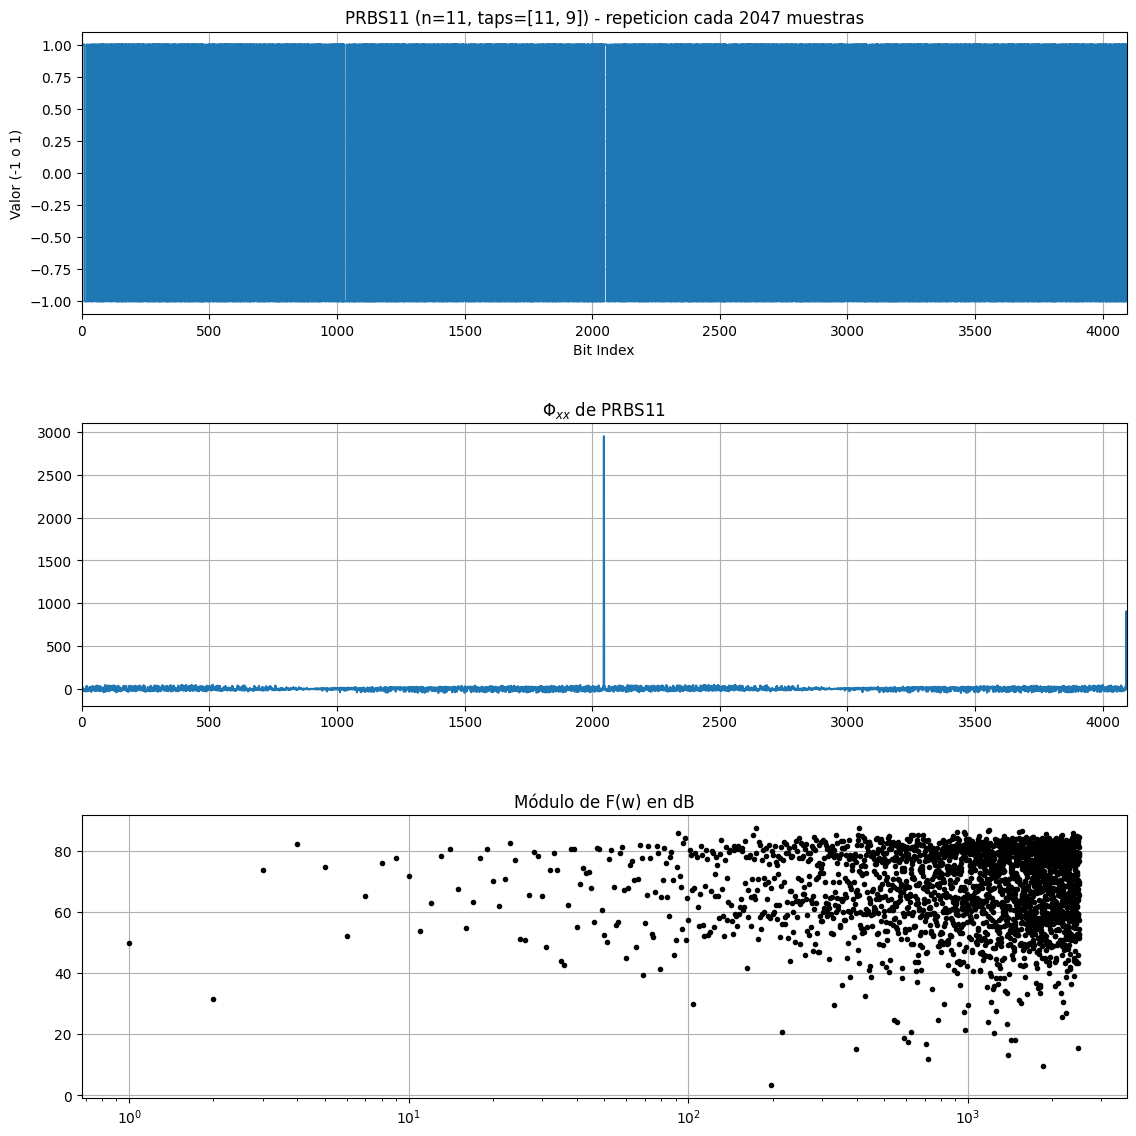

In [6]:
# Graficar PRBS11
plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)
plt.step(range(num_bits_to_plot), prbs11_sequence_mapped, where='post')
plt.title(f'PRBS11 (n={n_11}, taps={taps_11}) - repeticion cada {2**11-1} muestras')
plt.xlabel('Bit Index')
plt.ylabel('Valor (-1 o 1)')
plt.ylim(-1.1, 1.1)
plt.xlim(0, 4094)
plt.grid(True)

fixx11=signal.correlate(prbs11_sequence_mapped, prbs11_sequence_mapped, mode='full')
SxM11=fft.fft(fixx11)

plt.subplot(3,1,2)
plt.grid(True)
plt.plot(fixx11[num_bits_to_plot:2*num_bits_to_plot-1])
plt.title(r'$\Phi_{xx}$ de PRBS11')
plt.xlim(0, 4094)
plt.subplot(3,1,3)
plt.grid(True)
plt.title("Módulo de F(w) en dB")
plt.semilogx(20*np.log10(abs(SxM11[1:int(num_bits_to_plot/2)])), ".k")
plt.tight_layout(pad=3.0)
plt.show()

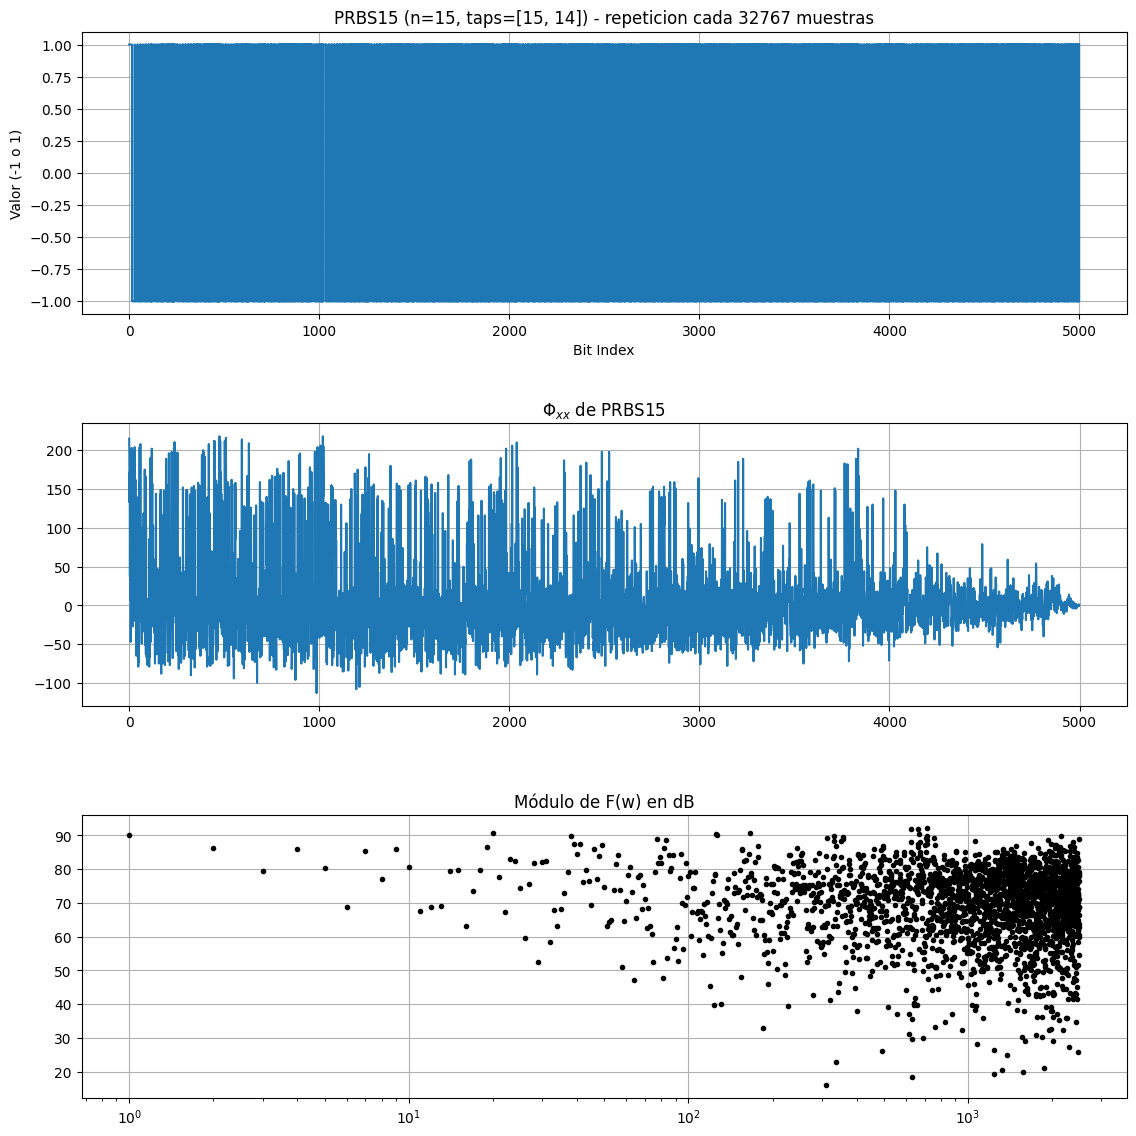

In [7]:
# Graficar PRBS15
plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)
plt.step(range(num_bits_to_plot), prbs15_sequence_mapped, where='post')
plt.title(f'PRBS15 (n={n_15}, taps={taps_15}) - repeticion cada {2**15-1} muestras')
plt.xlabel('Bit Index')
plt.ylabel('Valor (-1 o 1)')
plt.ylim(-1.1, 1.1)
plt.grid(True)

fixx15=signal.correlate(prbs15_sequence_mapped, prbs15_sequence_mapped, mode='full')
SxM15=fft.fft(fixx15)

plt.subplot(3,1,2)
plt.grid(True)
plt.plot(fixx15[num_bits_to_plot:2*num_bits_to_plot-1])
plt.title(r'$\Phi_{xx}$ de PRBS15')

plt.subplot(3,1,3)
plt.title("Módulo de F(w) en dB")
plt.semilogx(20*np.log10(abs(SxM15[1:int(num_bits_to_plot/2)])), ".k")
plt.grid(True)
plt.tight_layout(pad=3.0)

plt.show()

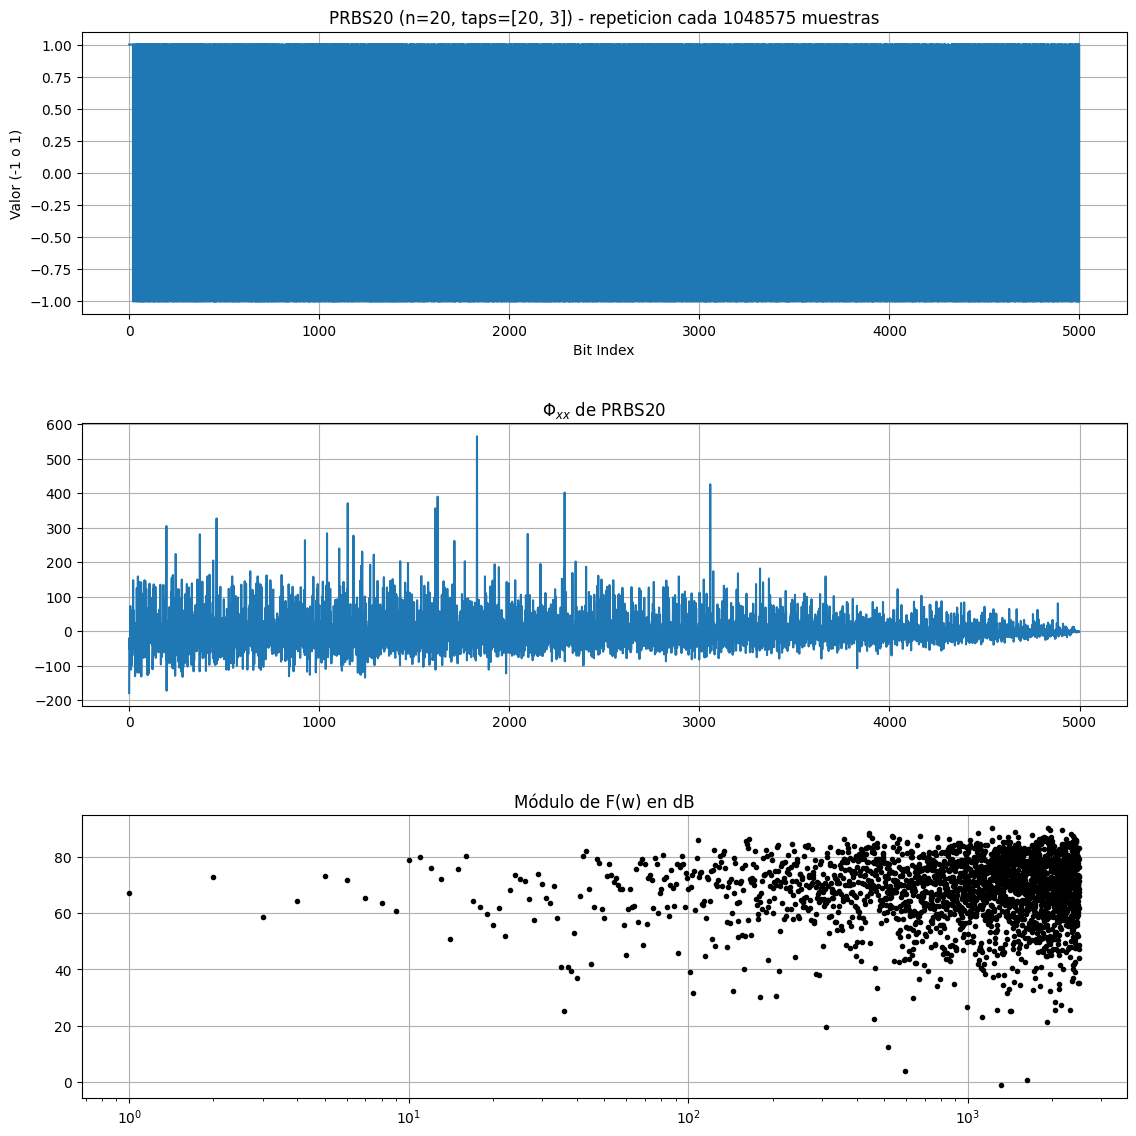

In [8]:
# Graficar PRBS20
plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)
plt.step(range(num_bits_20_plot), prbs20_sequence_mapped, where='post')
plt.title(f'PRBS20 (n={n_20}, taps={taps_20}) - repeticion cada {2**20-1} muestras')
plt.xlabel('Bit Index')
plt.ylabel('Valor (-1 o 1)')
plt.ylim(-1.1, 1.1)
plt.grid(True)

fixx20=signal.correlate(prbs20_sequence_mapped, prbs20_sequence_mapped, mode='full')
SxM20=fft.fft(fixx20)

plt.subplot(3,1,2)
plt.grid(True)
plt.title(r'$\Phi_{xx}$ de PRBS20')
plt.plot(fixx20[num_bits_20_plot:2*num_bits_20_plot-1])
plt.subplot(3,1,3)
plt.title("Módulo de F(w) en dB")
plt.grid(True)
plt.semilogx(20*np.log10(abs(SxM20[1:int(num_bits_20_plot/2)])), ".k")
plt.tight_layout(pad=3.0) # Ajusta el valor de 'pad' para controlar la separación
plt.show()
